# Bayesian Dynamic Linear Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import pydlm
import math
import statsmodels as sm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# data is downloadable at https://lp-prod-resources.s3.amazonaws.com/251/43971/2021-02-05-19-12-42/h2weekly.csv
df = pd.read_csv('h2weekly.csv')

In [3]:
df.head()

,Date,IsCanceled
0,2015-06-21,97
1,2015-06-28,153
2,2015-07-05,228
3,2015-07-12,321
4,2015-07-19,159


In [4]:
df.Date = pd.to_datetime(df.Date)

In [5]:
df = df.set_index('Date')

<AxesSubplot:xlabel='Date'>

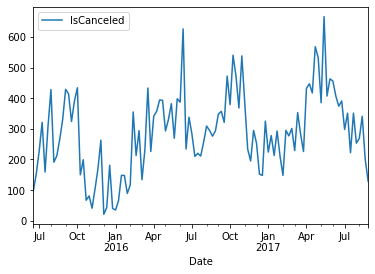

In [6]:
df.plot()

### Autocorrelation and Partial Autocorrelation Plots

In [7]:
acf(df.IsCanceled)

/Users/amir/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/amir/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([ 1.00000000e+00,  5.92888954e-01,  5.48850205e-01,  5.37000712e-01,
        4.31682822e-01,  3.25961139e-01,  2.17584692e-01,  1.92590932e-01,
        2.17882282e-01,  8.76673637e-02, -6.57767423e-03, -4.37376375e-02,
       -5.35017367e-02, -1.07476228e-01, -2.38858036e-01, -1.33530318e-01,
       -1.19857607e-01, -8.15091354e-02, -1.29787212e-01, -1.02581967e-01,
       -3.72644614e-02, -7.80160550e-02, -8.68811589e-02, -9.56165589e-02,
        3.17330180e-02,  5.81209235e-02,  7.98602439e-04,  7.07480396e-02,
        2.12908026e-01,  1.31543365e-01,  1.40459741e-01,  5.41431532e-02,
        9.36674861e-02,  7.35118941e-02, -1.65770420e-02, -1.55873812e-02,
        5.79842884e-02,  3.08998448e-02, -7.91610715e-02, -1.13521728e-01,
       -8.99399166e-02])

/Users/amir/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


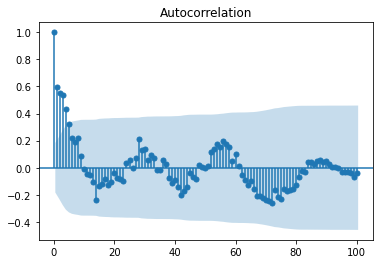

In [9]:
fig = plot_acf(df, lags=100)
fig.show()

In [11]:
pacf(df.IsCanceled)

/Users/amir/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([ 1.00000000e+00,  5.98089735e-01,  3.12714589e-01,  2.32537726e-01,
        5.92632736e-04, -1.09933975e-01, -1.67666843e-01, -3.69099953e-04,
        1.85228798e-01, -8.08323855e-02, -2.09016331e-01, -1.75795670e-01,
        2.52595193e-02,  7.08978524e-02, -1.81057918e-01,  1.19230690e-01,
        6.17113635e-02,  2.10950985e-01, -8.59909491e-02, -1.04198566e-01,
       -1.53929243e-02, -2.88803600e-02,  9.54292050e-02, -1.56298142e-01,
        2.04974346e-01,  9.97655564e-02, -5.55447504e-02,  3.81287988e-03,
        2.65424263e-01,  1.21126660e-02, -6.45248686e-02, -3.47808853e-01,
       -1.88535317e-01,  6.25588835e-02,  7.28708912e-02, -3.09894369e-02,
        1.31294136e-01,  6.13878052e-02, -1.71383033e-01, -2.71885431e-01,
       -2.82290579e-02])

/Users/amir/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


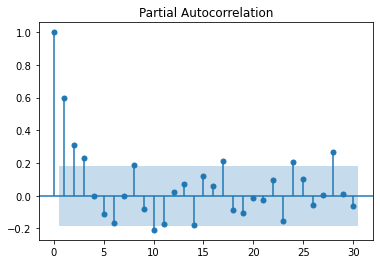

In [13]:
fig = plot_pacf(df.IsCanceled, lags=30)
fig.show()

## Byesian model without dynamic or automatic components

In [51]:
from pydlm import dlm, trend, seasonality

linear_trend = trend(degree=1, discount=0.9, name='linear_trend', w=10)
seasonal = seasonality(period=28, discount=0.9, name='seasonal', w=10)
simple_dlm = dlm(df.IsCanceled) + linear_trend + seasonal

In [52]:
simple_dlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


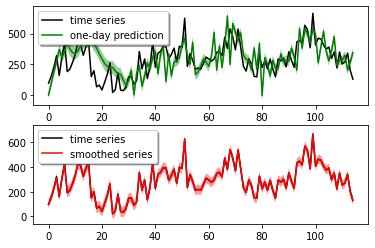

In [53]:
# simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot()

In [38]:
simple_dlm.ls()

The static components are
linear_trend (degree = 2)
seasonal (degree = 28)
 
There is no dynamic component.
 
There is no automatic component.


In [39]:
simple_dlm_mse=simple_dlm.getMSE()

In [40]:
math.sqrt(simple_dlm_mse)

124.28653141706431

In [41]:
from pydlm import modelTuner
tuner = modelTuner(method='gradient_descent', loss='mse')
tuned_dlm = tuner.tune(simple_dlm, maxit=200)

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


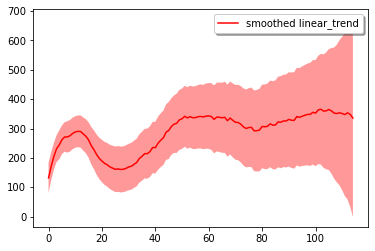

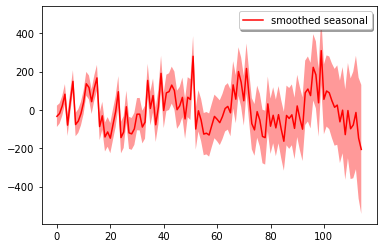

In [48]:
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal')

## Prediction

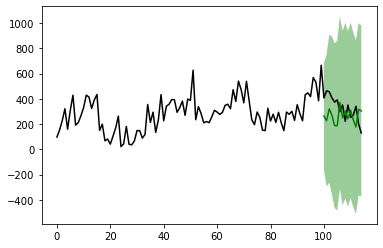

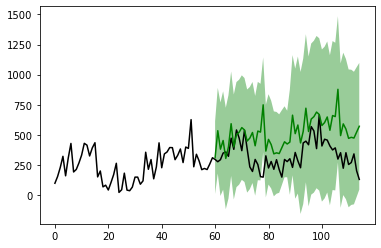

In [54]:
# Plotted prediction for the first 100 weeks, with a forecast generated for the following 15 weeks.
simple_dlm.plotPredictN(date=100, N=15)
# Plotted prediction for the first 60 weeks, with a forecast generated for the following 55 weeks.
simple_dlm.plotPredictN(date=60, N=55)

In [55]:
a=simple_dlm.predictN(date=100, N=15)
a

([263.3174737942917,
  227.05996523460766,
  319.9967061169414,
  270.2030540969283,
  187.4350235496223,
  186.60535616188514,
  370.65427324048744,
  248.24849416542736,
  305.145158229602,
  242.31288408960125,
  309.3447983450882,
  233.93910704440464,
  176.43960422814703,
  316.1330179615115,
  303.94095313501373],
 [46287.05767710939,
  70946.24378207633,
  88881.84543708569,
  101791.37597110425,
  110938.68686400702,
  117270.72701562673,
  121491.61429750659,
  124119.06391000653,
  125528.80368525829,
  125989.63861301668,
  125691.11468331837,
  124765.47786005415,
  123304.8839134684,
  121385.03980504509,
  119041.34384723988])

## Bayesian model with dynamic and autoregressive components included

In [67]:
from pydlm import dynamic, autoReg, longSeason
# construct the base
myDLM = dlm(df.IsCanceled)
myDLM = myDLM + trend(1, name='lineTrend', w=1.0)
myDLM = myDLM + seasonality(28, name='28wks', w=1.0)
myDLM = myDLM + autoReg(degree=2, data=df.IsCanceled, name='ar2', w=1.0)

# introduce dynamic component
features = [[1.0, 2.0] for i in range(115)]
ctrend = dynamic(features = features, name = 'random', discount = 0.9)
myDLM = myDLM + ctrend

# show the added components
myDLM.ls()

The static components are
lineTrend (degree = 2)
28wks (degree = 28)
 
The dynamic components are
random (dimension = 2)
 
The automatic components are
ar2 (dimension = 2)


In [68]:
myDLM.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [69]:
myDLM.fitForwardFilter()
myDLM.fitBackwardSmoother()

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


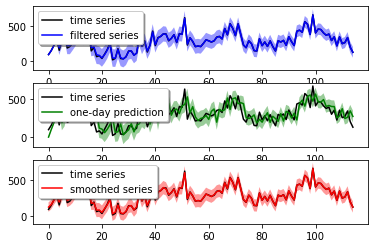

In [70]:
myDLM.turnOff('data points')
myDLM.plot()

In [71]:
myDLM.turnOn('smoothed plot')
myDLM.turnOff('predict')

In [72]:
myTuner = modelTuner(method='gradient_descent', loss='mse')
tunedDLM = myTuner.tune(myDLM, maxit=100)

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


In [73]:
myDLM_mse = myDLM.getMSE()
myDLM_mse

12105.541458242194

In [75]:
tunedDLM.fit()

In [76]:
tunedDLM_mse = tunedDLM.getMSE()
tunedDLM_mse

11546.747154615288

In [78]:
math.sqrt(tunedDLM_mse)

107.45579162900103

## Prediction

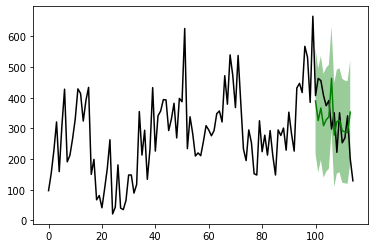

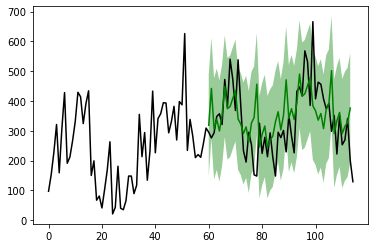

In [79]:
# Plotted prediction for the first 100 weeks, with a forecast generated for the following 14 weeks.
tunedDLM.plotPredictN(date=100, N=14)
# Plotted prediction for the first 60 weeks, with a forecast generated for the following 54 weeks.
tunedDLM.plotPredictN(date=60, N=54)

In [80]:
a=tunedDLM.predictN(date=100, N=14)
a

([389.65379083305953,
  325.8197367932303,
  366.4466332657559,
  308.9353645252785,
  328.3549690821459,
  337.74515887436996,
  463.41170275388475,
  278.2237010630164,
  322.3573482790815,
  326.28552770678306,
  292.50501967051383,
  288.4951210204629,
  286.7169316170384,
  353.2426935226569],
 [7710.408953519999,
  7492.933746171406,
  7495.993376299356,
  7482.29496837664,
  7483.263977006287,
  7483.175318653474,
  7484.657004655425,
  7486.48569083401,
  7488.650222939428,
  7490.324715522025,
  7492.328182855596,
  7298.585642807286,
  7297.638413645014,
  7297.44347104681])